# 1. 数组操作

## 1.1 更改形状

- 在对数组进行操作时，为了满足格式和计算的要求通常会改变其形状
- numpy.ndarray.shape表示数组的维度，返回一个元组，这个元组的长度就是维度的数目，即 ndim 属性(秩)
- numpy.ndarray.flat 将数组转换为一维的迭代器，可以用for访问数组每一个元素

In [4]:
#通过修改 shape 属性来改变数组的形状
import numpy as np

x = np.array([1, 2, 9, 4, 5, 6, 7, 8])
print(x.shape)

x.shape = [2, 4] #这步是将原本的一维数组改成二维的，2行，4列
print(x)

(8,)
[[1 2 9 4]
 [5 6 7 8]]


In [15]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x.flat
for i in y:
    print(i, end=' ')
    
y[3] = 0
print(end='\n')
print(x)

11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 
[[11 12 13  0 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


- numpy.ndarray.flatten([order='C']) 将数组的副本转换为一维数组，并返回, order：'C' -- columns，'F' -- rows，'A' -- 原顺序，'k' -- 元素在内存中的出现顺序。(简记)

In [18]:
#flatten()函数返回的是拷贝
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x.flatten()
print(y)

y[3] = 0
print(x) #对y的改动，不影响x

[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35]
[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


In [19]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = x.flatten(order='F')
print(y) #y的顺序先row 后column

[11 16 21 26 31 12 17 22 27 32 13 18 23 28 33 14 19 24 29 34 15 20 25 30
 35]


### Reference

##### What is a view of a NumPy array?
As its name is saying, it is simply another way of viewing the data of the array. Technically, that means that the data of both objects is shared. You can create views by selecting a slice of the original array, or also by changing the dtype (or a combination of both). 

#####  The Difference Between Copy and View
1. The main difference between a copy and a view of an array is that the copy is a new array, and the view is just a view of the original array.

2. The copy owns the data and any changes made to the copy will not affect original array, and any changes made to the original array will not affect the copy.

3. The view does not own the data and any changes made to the view will affect the original array, and any changes made to the original array will affect the view.

#####  Check if Array Owns it's Data
1. As mentioned above, copies owns the data, and views does not own the data, but how can we check this?

2. Every NumPy array has the attribute base that returns None if the array owns the data.

3. Otherwise, the base  attribute refers to the original object.

- numpy.ravel(a, order='C')Return a contiguous flattened array
- ravel()返回的是视图

In [24]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.ravel(x)
print(y)
y[3] = 0
print(x)

print(x.base)
print(y.base)

[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35]
[[11 12 13  0 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]
None
[[11 12 13  0 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


In [25]:
#order=F 就是拷贝
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.ravel(x, order='F')
print(y)

y[3] = 0
print(x)

[11 16 21 26 31 12 17 22 27 32 13 18 23 28 33 14 19 24 29 34 15 20 25 30
 35]
[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


- numpy.reshape(a, newshape[, order='C'])在不更改数据的情况下为数组赋予新的形状
- reshape()函数当参数newshape = [rows,-1]时，将根据行数自动确定列数。

In [27]:
x = np.arange(12)
y = np.reshape(x, [3, 4]) #3 rows and 4 columns
print(y)

y = np.reshape(x, [3, -1]) #3 rows and let it decides columns #
print(y)

y = np.reshape(x,[-1,3]) #3 columns and let it decides rows #
print(y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [30]:
y[0, 1] = 10
print(x) #当x reshape 后，若y值改变，则x的元素也改变
print(y)

[ 0 10  2  3  4  5  6  7  8  9 10 11]
[[ 0 10  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [32]:
#reshape()函数当参数newshape = -1时，表示将数组降为一维。
x = np.random.randint(12, size=[2, 2, 3])
print(x)

y = np.reshape(x, -1)
print(y)

[[[ 0  4  0]
  [ 3  3  7]]

 [[ 3 11 10]
  [11 10 10]]]
[ 0  4  0  3  3  7  3 11 10 11 10 10]


## 1.2 数组转置

- numpy.transpose(a, axes=None) Permute the dimensions of an array.
- numpy.ndarray.T Same as self.transpose(), except that self is returned if self.ndim < 2.

In [33]:
x = np.random.rand(5, 5) * 10
x = np.around(x, 2)
print(x)

y = x.T
print(y)

y = np.transpose(x)
print(y)

[[1.96 4.01 7.47 0.01 1.28]
 [1.69 6.58 1.4  2.05 5.25]
 [5.09 6.26 6.77 4.71 2.68]
 [8.89 1.77 6.17 2.3  4.43]
 [3.22 7.19 3.54 1.86 6.28]]
[[1.96 1.69 5.09 8.89 3.22]
 [4.01 6.58 6.26 1.77 7.19]
 [7.47 1.4  6.77 6.17 3.54]
 [0.01 2.05 4.71 2.3  1.86]
 [1.28 5.25 2.68 4.43 6.28]]
[[1.96 1.69 5.09 8.89 3.22]
 [4.01 6.58 6.26 1.77 7.19]
 [7.47 1.4  6.77 6.17 3.54]
 [0.01 2.05 4.71 2.3  1.86]
 [1.28 5.25 2.68 4.43 6.28]]


## 1.3 更改纬度

当创建一个数组之后，还可以给它增加一个维度，这在矩阵计算中经常会用到。
- numpy.newaxis = None None的别名，对索引数组很有用。
- 很多工具包在进行计算时都会先判断输入数据的维度是否满足要求，如果输入数据达不到指定的维度时，可以使用newaxis参数来增加一个维度。
- is used to increase the dimension of the existing array by one more dimension, when used once. Thus,

1D array will become 2D array

2D array will become 3D array

3D array will become 4D array

4D array will become 5D array

In [48]:
x = np.array([1, 2, 9, 4, 5, 6, 7, 8])
print(x.shape)
print(x)

y = x[np.newaxis, :] #维度在原基础上增加1，原本为1维，此时，np.newaxis在row上为1，保留原本的 column 即shape为（1，8）
print(y.shape)
print(y)


y = x[:, np.newaxis] #此时，row为8，而column为1，即shape为（8，1）
print(y.shape)
print(y)

(8,)
[1 2 9 4 5 6 7 8]
(1, 8)
[[1 2 9 4 5 6 7 8]]
(8, 1)
[[1]
 [2]
 [9]
 [4]
 [5]
 [6]
 [7]
 [8]]


![image](https://i.stack.imgur.com/zkMBy.png)

numpy.squeeze(a, axis=None) 从数组的形状中删除单维度条目，即把shape中为1的维度去掉。
- a表示输入的数组；
- axis用于指定需要删除的维度，但是指定的维度必须为单维度，否则将会报错；

在机器学习和深度学习中，通常算法的结果是可以表示向量的数组（即包含两对或以上的方括号形式[[]]），如果直接利用这个数组进行画图可能显示界面为空（见后面的示例）。我们可以利用squeeze()函数将表示向量的数组转换为秩为1的数组，这样利用 matplotlib 库函数画图时，就可以正常的显示结果了。

In [50]:
x = np.arange(10)
print(x.shape) 
x = x[np.newaxis, :]
print(x.shape)
y = np.squeeze(x)
print(y.shape)

(10,)
(1, 10)
(10,)


In [51]:
x = np.array([[[0], [1], [2]]])
print(x.shape)
print(x)

(1, 3, 1)
[[[0]
  [1]
  [2]]]


In [52]:
y = np.squeeze(x)
print(y.shape) 
print(y)

(3,)
[0 1 2]


In [53]:
y = np.squeeze(x, axis=0)
print(y.shape)
print(y)

(3, 1)
[[0]
 [1]
 [2]]


In [54]:
y = np.squeeze(x, axis=2)
print(y.shape)
print(y) 

#y = np.squeeze(x, axis=1)
# ValueError: cannot select an axis to squeeze out which has size not equal to one

(1, 3)
[[0 1 2]]


(1, 5)


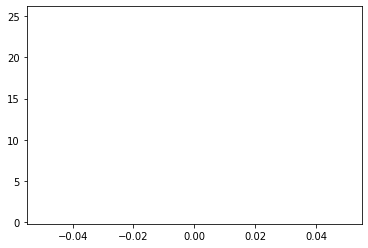

In [56]:
import matplotlib.pyplot as plt
x = np.array([[1, 4, 9, 16, 25]])
print(x.shape)
plt.plot(x)
plt.show()

(5,)


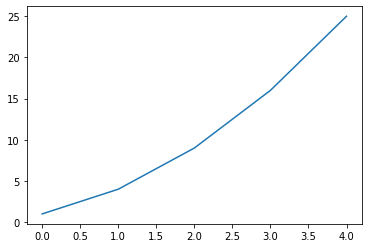

In [57]:
x = np.array([[1, 4, 9, 16, 25]])
x = np.squeeze(x)
print(x.shape)
plt.plot(x)
plt.show()

## 1.3 数组组合

如果要将两份数据组合到一起，就需要拼接操作。

- numpy.concatenate((a1, a2, ...), axis=0, out=None) Join a sequence of arrays along an existing axis.
- numpy.stack(arrays, axis=0, out=None)Join a sequence of arrays along a new axis.

In [58]:
x = np.array([1, 2, 3])
y = np.array([7, 8, 9])
z = np.concatenate([x, y])
print(z)

[1 2 3 7 8 9]


In [61]:
z = np.concatenate([x, y], axis=0)
print(z)

[1 2 3 7 8 9]


In [63]:
x = np.array([1, 2, 3]).reshape(1, 3)
y = np.array([7, 8, 9]).reshape(1, 3)
z = np.concatenate([x, y])
print(z)

[[1 2 3]
 [7 8 9]]


In [66]:
z = np.concatenate([x, y], axis=0)
print(z)
print(z.shape)

z = np.concatenate([x, y], axis=1)
print(z)
print(z.shape)

[[1 2 3]
 [7 8 9]]
(2, 3)
[[1 2 3 7 8 9]]
(1, 6)


In [67]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7, 8, 9], [10, 11, 12]])
z = np.concatenate([x, y])
print(z)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [69]:
z = np.concatenate([x, y], axis=0)
print(z)
print(z.shape)

z = np.concatenate([x, y], axis=1)
print(z)
print(z.shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
(2, 6)


In [71]:
x = np.array([1, 2, 3])
y = np.array([7, 8, 9])
z = np.stack([x, y])
print(z.shape) 
print(z)

z = np.stack([x, y], axis=1)
print(z.shape) 
print(z)

(2, 3)
[[1 2 3]
 [7 8 9]]
(3, 2)
[[1 7]
 [2 8]
 [3 9]]


In [72]:
x = np.array([1, 2, 3]).reshape(1, 3)
y = np.array([7, 8, 9]).reshape(1, 3)
z = np.stack([x, y])
print(z.shape)
print(z)

z = np.stack([x, y], axis=1)
print(z.shape)
print(z)

z = np.stack([x, y], axis=2)
print(z.shape)
print(z)

(2, 1, 3)
[[[1 2 3]]

 [[7 8 9]]]
(1, 2, 3)
[[[1 2 3]
  [7 8 9]]]
(1, 3, 2)
[[[1 7]
  [2 8]
  [3 9]]]


In [73]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7, 8, 9], [10, 11, 12]])
z = np.stack([x, y])
print(z.shape) #3维，而concatenate的维度不会增加
print(z)

z = np.stack([x, y], axis=1)
print(z.shape) 
print(z)

z = np.stack([x, y], axis=2)
print(z.shape)
print(z)


(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)
[[[ 1  2  3]
  [ 7  8  9]]

 [[ 4  5  6]
  [10 11 12]]]
(2, 3, 2)
[[[ 1  7]
  [ 2  8]
  [ 3  9]]

 [[ 4 10]
  [ 5 11]
  [ 6 12]]]


## 1.4 数组拆分

numpy.split(ary, indices_or_sections, axis=0) Split an array into multiple sub-arrays as views into ary.

In [74]:
x = np.array([[11, 12, 13, 14],
              [16, 17, 18, 19],
              [21, 22, 23, 24]])
y = np.split(x, [1, 3])
print(y)

y = np.split(x, [1, 3], axis=1)
print(y)

[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
       [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int64)]
[array([[11],
       [16],
       [21]]), array([[12, 13],
       [17, 18],
       [22, 23]]), array([[14],
       [19],
       [24]])]


numpy.vsplit(ary, indices_or_sections) Split an array into multiple sub-arrays vertically (row-wise)

In [75]:
x = np.array([[11, 12, 13, 14],
              [16, 17, 18, 19],
              [21, 22, 23, 24]])
y = np.vsplit(x, 3)
print(y)

y = np.split(x, 3)
print(y)


[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19]]), array([[21, 22, 23, 24]])]
[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19]]), array([[21, 22, 23, 24]])]


In [76]:
y = np.vsplit(x, [1])
print(y)

y = np.split(x, [1])
print(y)

y = np.vsplit(x, [1, 3])
print(y)

y = np.split(x, [1, 3], axis=0)
print(y)

[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
       [21, 22, 23, 24]])]
[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
       [21, 22, 23, 24]])]
[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
       [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int64)]
[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
       [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int64)]


numpy.hsplit(ary, indices_or_sections) Split an array into multiple sub-arrays horizontally (column-wise).

In [77]:
x = np.array([[11, 12, 13, 14],
              [16, 17, 18, 19],
              [21, 22, 23, 24]])
y = np.hsplit(x, 2)
print(y)


y = np.split(x, 2, axis=1)
print(y)

[array([[11, 12],
       [16, 17],
       [21, 22]]), array([[13, 14],
       [18, 19],
       [23, 24]])]
[array([[11, 12],
       [16, 17],
       [21, 22]]), array([[13, 14],
       [18, 19],
       [23, 24]])]


In [78]:
y = np.hsplit(x, [3])
print(y)

y = np.split(x, [3], axis=1)
print(y)

y = np.hsplit(x, [1, 3])
print(y)

y = np.split(x, [1, 3], axis=1)
print(y)

[array([[11, 12, 13],
       [16, 17, 18],
       [21, 22, 23]]), array([[14],
       [19],
       [24]])]
[array([[11, 12, 13],
       [16, 17, 18],
       [21, 22, 23]]), array([[14],
       [19],
       [24]])]
[array([[11],
       [16],
       [21]]), array([[12, 13],
       [17, 18],
       [22, 23]]), array([[14],
       [19],
       [24]])]
[array([[11],
       [16],
       [21]]), array([[12, 13],
       [17, 18],
       [22, 23]]), array([[14],
       [19],
       [24]])]


## 1.5 数组平铺

numpy.tile(A, reps) Construct an array by repeating A the number of times given by reps.

In [80]:
x = np.array([[1, 2], [3, 4]])
print(x)

y = np.tile(x, (1, 3)) #rows 1倍，columns上3倍
print(y)

y = np.tile(x, (3, 1)) #rows 3倍，columns上1倍
print(y)

[[1 2]
 [3 4]]
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]


In [81]:
y = np.tile(x, (3, 3))
print(y)

[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]]


numpy.repeat(a, repeats, axis=None) Repeat elements of an array.
- axis=0，沿着y轴复制，实际上增加了行数。
- axis=1，沿着x轴复制，实际上增加了列数。
- repeats，可以为一个数，也可以为一个矩阵。
- axis=None时就会flatten当前矩阵，实际上就是变成了一个行向量。

In [82]:
x = np.repeat(3, 4)
print(x)

x = np.array([[1, 2], [3, 4]])
y = np.repeat(x, 2)
print(y)

y = np.repeat(x, 2, axis=0)
print(y)

y = np.repeat(x, 2, axis=1)
print(y)

[3 3 3 3]
[1 1 2 2 3 3 4 4]
[[1 2]
 [1 2]
 [3 4]
 [3 4]]
[[1 1 2 2]
 [3 3 4 4]]


In [83]:
y = np.repeat(x, [2, 3], axis=0)
print(y)

y = np.repeat(x, [2, 3], axis=1)
print(y)

[[1 2]
 [1 2]
 [3 4]
 [3 4]
 [3 4]]
[[1 1 2 2 2]
 [3 3 4 4 4]]


## 1.6 添加和删除元素

numpy.unique(ar, return_index=False, return_inverse=False,return_counts=False, axis=None) Find the unique elements of an array.
- return_index：the indices of the input array that give the unique values
- return_inverse：the indices of the unique array that reconstruct the input array
- return_counts：the number of times each unique value comes up in the input array

In [96]:
#查找数组的唯一元素
a=np.array([1,1,2,3,3,4,4])
b=np.unique(a,return_counts=True) #return的b里面包括了2个arr，第一个是出现的数字，第二个是数字对应的出现次数
print(b)
print(b[0])
print(b[1])
print(list(b[1]).index(1)) #返回b[1] list中，数字为1的位置是多少，再用b[0][位置]找出对应的arr里的数字
print(b[0][list(b[1]).index(1)])

(array([1, 2, 3, 4]), array([2, 1, 2, 2]))
[1 2 3 4]
[2 1 2 2]
1
2
